#### MA124 Maths by Computer
# Project: Modelling in Epidemiology
### Jamie Merchant (A2, A4, B Part 3), Andronikos Chalatzioukas (A3, A5, B Part 1), James Latto (A1, B Part 2)

#### Background
Epidemiological models are increasingly used during infectious disease outbreaks to make outbreak projections and to guide control interventions. This project involves developing simple computational models of outbreaks and using them to predict the effects of different interventions. It also involves using stochastic epidemiological models (models that include randomness) to predict the risk that early cases at the beginning of an outbreak lead on to a major epidemic (with a large number of cases) as opposed to fade out as a minor outbreak (with a small number of cases). 

If more details are required about the background epidemiological modelling theory, please rewatch the Epidemiology Lecture, available on the MA124 moodle page.

#### Structure of project
There are six tasks in the document below, tasks A1-A5 and then task B1. Your group should do all six of these tasks. Tasks A1-A5 are worth approximately 60% of the credit for this submission and task B1 is worth the rest (approximately 40%).

#### Notes about submission
Read through the document **MA124 Maths by Computer Tutor Group Projects Information for Students.pdf** on the MA124 Moodle page.

Before submitting see the notes at the end of this document.

#### Allowed libraries for this project 
Python libraries/modules should be used as required to complete the tasks in this project, with no restrictions.

## Section A (worth approximately 60% of the marks)

## The Deterministic SIR model

In the Epidemiology lecture, you met the deterministic SIR model given by a system of three ODEs.

This part of the assignment builds on the "Epidemiology I code" notebook, which provides code for numerically solving the SIR model in Python. We are interested in extensions to the SIR model as presented there: specifically, extensions involving public health measures such as vaccination and social distancing.

Note: You are expected to add code and markdown cells to this document as appropriate to provide your responses to the tasks. However, throughout this assignment, please do use the deterministic and stochastic SIR model codes from the Epidemiology I and Epidemiology II code notebooks as required (i.e., you are supposed to copy that code across and adapt it, rather than start coding from scratch).

---

## Task A1. Baseline case (worth approximately 12% of the marks)
**Assignment:** Using Python, solve the deterministic SIR model numerically and examine the solution for one set of parameter values and one initial condition. Then, adapt the code to rerun the analysis multiple times for different infection rates.

Details: 
- Use the following parameter values for the baseline case (where, throughout this Assignment, time is measured in days): $\beta = 2 \times 10^{-5}$, $\mu = 0.1$, $N = 10^{4}$.
- Initiate the numerical solution starting with 3 infected individuals, with the remainder of the population susceptible.
- Produce two plots: a time-series showing $S(t)$, $I(t)$ and $R(t)$ and a phase plane (in the $(S,I)$ plane).
- On both plots, indicate the point on the trajectory where $I$ reaches its maximum as black circles, and print this maximum value (when you print the value, round this value to the largest integer that is less than this value).
- Now repeat this analysis a large number of times for different values of $\beta$ (without generating a figure each time; so as to not generate a huge number of figures!) Plot the maximum value of $I$ as a function of $\beta$, choosing an appropriate range of values of $\beta$ (and sufficiently many values) to be able to see the dependence clearly.

Hint: You might like to Google the appropriate NumPy function that finds the maximum value in a vector. For the last part, use a FOR loop rather than changing the value of $\beta$ manually.

Once you have completed this, you might like to help your team member who is doing Task A4 below!

*Insert code and markdown cells below, as appropriate, in which to provide your response to this task.*

---

# Explanation of the compartmental deterministic SIR model

The compartmental deterministic SIR model involves categorising the population into 3 different compartments: (S)usceptible, (I)nfected and (R)ecovered. Then, tracking the rate at which individuals move between the three compartments. Given a total population size of $N$, we see $N = S + I + R$\
\
At any time $t$ the infection rate (rate people move from S to I) is $\beta S I$ and the removal rate (rate people move from I to R) is $\mu I$. In the SIR model, once an individual has recovered from the disease they can no longer get re-infected and so remain in the (R)ecovered category. \
\
This gives differential equations: \
$$\frac {{\rm d} S}{{\rm d} t} = - \beta S I$$\
$$\frac{{\rm d} I}{{\rm d} t} = \beta S I - \mu I $$\
$$\frac{{\rm d} R}{{\rm d} t} = \mu I $$ 

In the deterministic model, these differential equations are solved (given initial parameters) to give a solution.

The code below runs there deterministic model given the initial parameters:\
$\beta = 2 \times 10^{-5} ,  \mu = 0.1 , N = 10^4 , I(0) = 3$



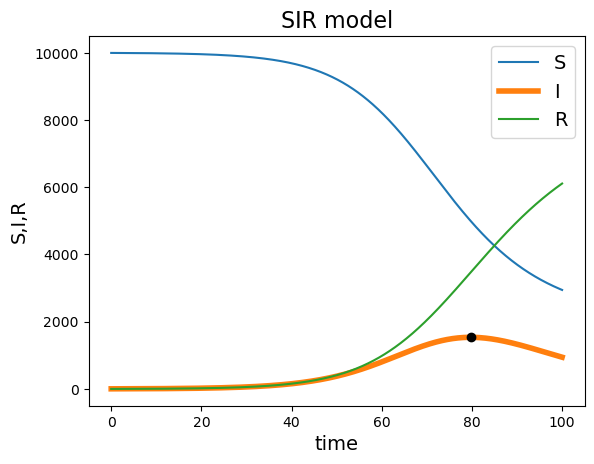

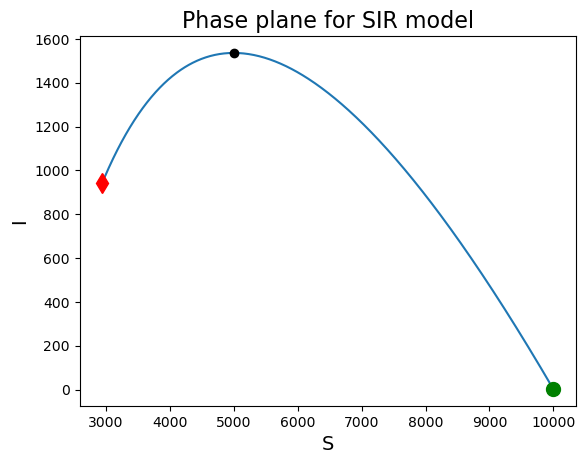

At the end of the simulation, the final values of S, I, and R are (rounded):
S(t=tf) = 2945
I(t=tf) = 944
R(t=tf) = 6111
The maximum value of I is 1535


In [7]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint 

# define the RHS of the ODE system
def SIR(y, t, beta, mu):
    #split the array y into its relevant parts
    S, I, R = y
    # define the differential equations for each S,I and R
    Sdot = -beta * S * I
    Idot = beta * S * I - mu * I
    Rdot = mu * I
    return Sdot, Idot, Rdot

# define the variables
beta = 2*(10**-5)
mu = 0.1
# create a linspace from 0 to 100 with 1000 steps
t = np.linspace(0, 100, 1001)

# set the initial values of S,I and R
S0 = 10**4 - 3
I0 = 3
R0 = 0

# create an array y0 of an array of the S,I and R initial values
y0 = np.array([S0, I0, R0])
# solve the ODE system with our parameters beta and mu, this gives us y_sol which contains 1000 arrays of length 3 with S,I and R for each time slot
y_sol = odeint(SIR, y0, t, args=(beta,mu))
# split y_sol into individal arrays for S,I and R
S = y_sol[:,0]
I = y_sol[:,1]
R = y_sol[:,2]

# work out the maximum value in I and then whats it's index is    
max_I = np.max(I)
index_of_max = np.where(I == np.max(I))[0]  

# plot the SIR graph showing S,I and R against time
plt.plot(t, S, label = "S")
plt.plot(t, I, lw = 4, label = "I")
plt.plot(t, R, label = "R")
# plot a black dot at the maximum I value
plt.plot(t[index_of_max],max_I,'ko')
        
# label the axis and title and show the graph     
plt.xlabel("time", fontsize = 14)
plt.ylabel("S,I,R", fontsize = 14)
plt.title("SIR model", fontsize = 16)
plt.legend(fontsize = 14)
plt.show()        
        
# plot the phase graph of I against S        
plt.plot(S, I)
plt.xlabel("S", fontsize = 14)
plt.ylabel("I", fontsize = 14)
plt.title("Phase plane for SIR model", fontsize = 16)
# plot a green circle at the start and a red diamond at the end of the phase plot        
plt.plot(S[0], I[0], 'go', markersize = 10)
plt.plot(S[-1], I[-1], 'rd', markersize = 10)
# plot a black dot ast the maximum value of I and show the graph
plt.plot(S[index_of_max],max_I,'ko')
plt.show()
        
# print the final values for S,I and R and then the maximum value of I        
print("At the end of the simulation, the final values of S, I, and R are (rounded):")
print("S(t=tf) =", round(S[-1]))
print("I(t=tf) =", round(I[-1]))
print("R(t=tf) =", round(R[-1]))
print("The maximum value of I is", int(max_I//1))

# Basic reproduction number $R0$
In our investigation of how the maximum value of $I$ varies with $\beta$, we will look at $R0$ (the basic reproduction number). $R0$ is important in this investigation as it gives the average number of infected people and infectious person will infect (in the completely susceptible population).\
\
$R0$ is given by $R0$ = infection rate $\times$ duration of infection.\
Since the infection rate is given by $\beta SI$ and we are assuming a completly suscpetible population ($S \approx N$ and $I = 1$) the infection rate can be given by $\beta N$. The duration of infection is then given by $\frac{1}{\mu}$ since the removal rate is $\mu$ so an person will spend $\frac{1}{\mu}$ in $I$ on average. \
Therefore we get the equation: $R0 = \frac{\beta N}{\mu}$ \
\
This tells us that $R0$ can be increased by:
- increasing the infection rate ($\beta$)
- increasing the population size ($N$)
- decreasing the removal rate ($\mu$)

### What $R0$ tells us:
We see that 
- if $R0$ > 1 then the outbreak is going to grow (initially)
- if $R0$ < 1 then the oubreak is going to decrease (initially)

# Investigating how the maximum value of I varies with $\beta$
We will now run our determinitic SIR model with a range of values for $\beta$ (keeping all other intial parameters the same) and investigate how this affects the maximum value of $I$. We will explore 1000 values of $\beta$ divided equally across the range $0$ to $10^{-3}$, run the model for each value of $\beta$ recording the maximum value of $I$ in each case, then plot a graph of these maximum values of $I$ against $\beta$.

Text(0.5, 1.0, 'Maximum number of infections against Beta')

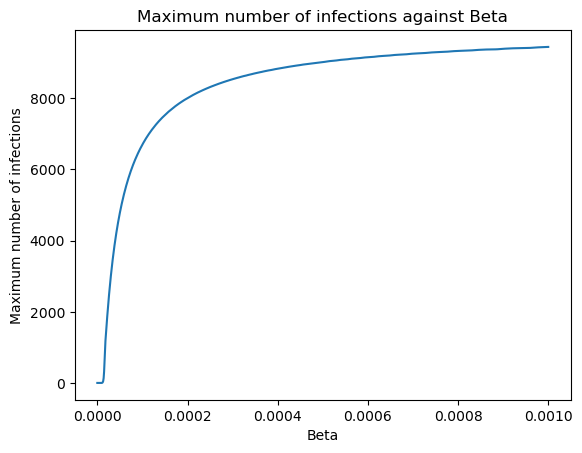

In [10]:
# create a linspace with a range of beta values
beta_values = np.linspace(0,10**-3,1000)
# create an empty vector to store maximum I values
max_values = []
# use a for loop to run the model for each beta in beta_values
for beta in beta_values:
   # create a linspace from 0 to 100 with 1000 steps
    t = np.linspace(0, 100, 1001)
    # set the initial values of S,I and R
    S0 = 10**4 - 3
    I0 = 3
    R0 = 0

    # create an array y0 of an array of the S,I and R initial values
    y0 = np.array([S0, I0, R0])
    # solve the ODE system with our parameters beta and mu, this gives us y_sol which contains 1000 arrays of length 3 with S,I and R for each time slot
    y_sol = odeint(SIR, y0, t, args=(beta,mu))
    # split y_sol into individal arrays for S,I and R
    S = y_sol[:,0]
    I = y_sol[:,1]
    R = y_sol[:,2]
    # add the maximu value of I to the array containing all max values of I
    max_values.append(np.max(I))

# plot a graph of how the maximum value of I varies with beta and label axis
plt.plot(beta_values,max_values)
plt.xlabel("Beta")
plt.ylabel("Maximum number of infections")
plt.title("Maximum number of infections against Beta")

# Results of how the maximum value of I varies with $\beta$
We will use the basic reproduction number of understand how $\beta$ affects the maximum value of $I$.

We see that intially, when $\beta$ is close to 0, that the maximum number of infections is only 3. This is because our infection rate is so small that the outbreak dies out immediately as our initial infectiomns do not infect anyone else.

When $\beta = 10^{-5}$, we see a sudden rapid growth in the maximum value of $I$. This is because, at $\beta = 10^{-5}$, the basic reproduction number is 1. This means on average every infectious person will infect 1 more person and so the outbreak will not immediately die out. Since increasing the value of $\beta$ beyond $\beta = 10^{-5}$ further increases the $R0$ we see a rapid growth in the maximum size of $I$

After this initial growth, when the maximum value of $I$ reaches around 8000 people, we start to see a saturation effect. This is because we only have a population size of 10,000 people in the simulation. This means as we get close to the population size, there are a decreasing amount of people left in (S)usceptible. Thefore, increasing the value of $\beta$ will have less and less of an effect on the maximum value of $I$ as the size of the S limits this (since the infection rate is given by $\beta SI$).

## Task A2. The effect of vaccination (worth approximately 12% of the marks)
**Assignment:** Using Python, solve the deterministic SIR model numerically for different numbers of individuals vaccinated. 

Details:
- Use the following parameter values for the baseline case: $\beta = 2 \times 10^{-5}$, $\mu = 0.1$, $N = 10^{4}$.
- Assume that each simulation starts with 5 infected individuals (with the remainder of the population susceptible, other than those who have been vaccinated).
- Assume that vaccination involves simply withdrawing susceptible individuals from the population (to a new $V$ compartment, which is different to the removed ($R$) compartment) instantaneously at the start of the numerical simulation, and that vaccination is perfectly effective.
- Make a plot of the total number of individuals who are either infected or removed (i.e., $I+R$) after 500 days as a function of the number of vaccinated hosts. Hint: This will require running the SIR model multiple times (once for each value of the number of vaccinated individuals, $V$) using a FOR loop.
- Add markers to the plot corresponding to the (strictly positive) numerical solution of the final size equation (explained in the Lecture and below), in which $N$ is simply reduced by $V$, for values of i) $V = 1000$; ii) $V = 2000$; iii) $V = 3000$.
- Include a derivation of the final size equation in your answer to this task.

- Hint: Recall that the final size equation is $x = N - N \rm{exp} \left( -\frac{\beta x}{\mu} \right)$ in a scenario without vaccination (vaccination then corresponds to reducing the value of $N$). You will have to look up an appropriate Python function to solve this equation numerically. To find the strictly positive solution (rather than the solution $x = 0$) numerically, a sufficiently large "initial guess" may need to be input to the relevant Python function.

*Insert code and markdown cells below, as appropriate, in which to provide your response to this task.*

---

### Our implementation of vaccination in a deterministic SIR model ###

In our deterministic SIR model (in this case with parameter values $\beta = 2\times 10^{-5} , \mu = 0.1 , N = 10^4 , I_{initial} = 5$) we shall assume vaccination involves simply withdrawing susceptible individuals from the population to a new $V$ compartment instantaneously at the start of the numerical simulation and that vaccination is 100% effective. 

Below our code involves varying the number of vaccinated individuals, $V$, from 0 to the whole populatation (who aren't already infected) and seeing how the total number of people ever infected over 500 days, $I + R$, changes. 

In [14]:
# import libraries

import numpy as np # Import NumPy library. The "np" bit tells Python to give NumPy the alias of np. So now we can call np. function_name rather than numpy.
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sympy import * # so we don't have to call sympy each time

In [15]:
# Define the constants (this is neccessary for our later use of beta and mu in the final size equation since we need them to be defined globally not just within that function)
beta = 2*(10**(-5))
mu = 0.1
N = 10**4

# Define RHS of ODE system
def SIR(y, t):
    S, I, R, V = y
    Sdot = -beta * S * I
    Idot = beta * S * I - mu * I
    Rdot = mu * I
    Vdot = 0
    return Sdot, Idot, Rdot, Vdot
# I have defined a new compartment for V in the SIR function.
# Here we are setting up our time grid
tf = 500
Nsteps = 1000
t = np.linspace(0, tf+1, Nsteps+1)

#below we are setting up arrays to store our values we will be plotting
V_Values = []
IplusR_Values = []

for V in range(0, 10**4 - 4, 100):
    # I have set it to 100 intervals otherwise we would have a long run time since many would need to be solved.
    # Create initial conditions and put into array y0
    S0 = 10**4 -5 - V
    I0 = 5
    R0 = 0
    V0 = V
    y0 = np.array([S0, I0, R0, V0])

    y_sol = odeint(SIR, y0, t)
    I = y_sol[:,1]
    R = y_sol[:,2]
    IplusR_Values.append(I[-1] + R[-1])
    # This is I + R at 500 days since the -1th term is the last one in our 500 day time interval
    V_Values.append(V)

### Final size equation for a system with vaccination derivation ###
$$\frac{{\rm d} I}{{\rm d} t} = \beta S I - \mu I, \quad
\frac {{\rm d} S}{{\rm d} t} = - \beta S I$$
$$\frac{{\rm d} I}{{\rm d} S} = -1 + \frac{{\rm \mu}}{{\rm \beta} S}$$
$$I = -S + \frac{\mu}{\beta} \ln(S) + C$$
Under initial conditions:
$$C = I(0) + S(0) -\frac{\mu}{\beta} \ln(S(0))$$
$$I = -S + \frac{\mu}{\beta} \ln(S) + I(0) + S(0) -\frac{\mu}{\beta} \ln(S(0))$$
At outbreak start; $I(0) + S(0) + V = N$
$$I = -S + \frac{\mu}{\beta} \ln(S) + N - V - \frac{\mu}{\beta} \ln(S(0))$$
At outbreak end, no more infections left ($I(\infty) = 0$ and $S(\infty) + R(\infty) + V = N$). 

So, taking limit t $\rightarrow \infty$:
$$0 = -(N - R(\infty) - V) + \frac{\mu}{\beta} \ln(N - R(\infty) - V) + N - V - \frac{\mu}{\beta} \ln(S(0))$$
By rearranging for the $R(\infty)$ within the $\ln$ we find the expression for our final size equation taking into account the number of people vaccinated:
$$R(\infty) = N - V - S(0) \exp(-\frac{\beta R(\infty)}{\mu})$$

We can go further: $S(0) = N - I(0) - V = N - 5 - V \approx N - V$ Leaving us with
$$R(\infty) = N - V - (N - V)\exp(-\frac{\beta R(\infty)}{\mu})$$

We shall use this formula as our Final Size Equation, neglecting the 5 people initially infected just as the original derivation from the lecture does.

In [17]:
# Solutions to final size equation, I shall do this with sympy.
x = symbols("x")
solutions = []
for i in (1000,2000,3000):
    solution = solve(Eq(x, (10**4-i) - (10**4-i)*exp(-beta*x/mu)))
    solutions.append(solution[1])
    # This [1] ensures we only choose the non-trivial solutions i.e where x is non-zero

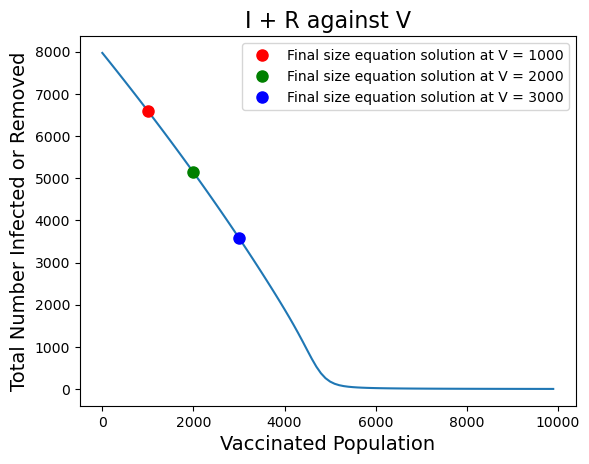

In [18]:
# Plot I + R against V
plt.plot(V_Values, IplusR_Values)
plt.xlabel("Vaccinated Population", fontsize = 14)
plt.ylabel("Total Number Infected or Removed", fontsize = 14)
plt.title("I + R against V", fontsize = 16)
# Plot the solutions to the final size equation as points
plt.plot(1000, solutions[0], 'ro', markersize = 8, label = "Final size equation solution at V = 1000")
plt.plot(2000, solutions[1], 'go', markersize = 8, label = "Final size equation solution at V = 2000")
plt.plot(3000, solutions[2], 'bo', markersize = 8, label = "Final size equation solution at V = 3000")
plt.legend(fontsize = 10)
plt.show()

### The effect of vaccination on the total number of infected and removed ###

From our graph we can see that our decrease in total $I + R$ over 500 days approximates a linear decrease as the number of vaccinated invdividuals increases before reaching the point when about half the population is vaccinated (in this case $V = 5000$) where the disease is no-longer able to spread. This is really important because it advises us that for a disease with these parameters we need to vaccinate at minimum about half the population to ensure the disease can't spread which is beneficial to know from an economic point of view so you don't have to pay for the entire population to be vaccinated in order to prevent a disease outbreak.

## Task A3. The effect of social distancing (worth approximately 12% of the marks)

The introduction and/or removal of social distancing can be modelled by varying the infection rate parameter, $\beta$. In this exercise, we will use the following time-dependent infection rate parameter:

$$
\beta(t)  = 2 \times 10^{-7} \text{  whenever  } t < T, \\
\beta(t)  = 1.5 \times 10^{-7} \text{  whenever  } T \le t \le T + 30, \\
\beta(t)  = 2 \times 10^{-7} \text{  whenever  } t > T + 30. \\
$$

**Assignment:** Using Python, run the deterministic SIR model for the social distancing strategy described above.

Details:
- For this task, use the values $\mu = 0.1$, $N = 10^{6}$, and assume that the initial values of $(S,I,R)$ are $(N-5,5,0)$.
- Run the SIR model, adapted according to the time-dependent value of $\beta$ described above, for a value of $T = 30$ days. Plot a time-series showing $S(t)$, $I(t)$ and $R(t)$.
- Consider a scenario in which $T$ is not necessarily 30 days, and can instead take a fixed integer value between 1 and 200 days. Write a FOR loop to identify the value of $T$ that minimises the maximum value of $I$ in the model simulation. Plot the maximum value of $I$ as a function of $T$, and print the value of $T$ that "flattens the curve" most.

*Insert code and markdown cells below, as appropriate, in which to provide your response to this task.*

---

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint 

In [22]:
def SIR(y, t):
    
    S, I, R = y

    T = 30
    
    def beta_value(t):                         #This creates a function for the value of beta with respect to time 
        beta = 0
        if T <= t <= T+30:
            beta = 1.5*(10**(-7))              #When t is between 30 and 60 beta is decreased
        else: 
            beta = 2*(10**(-7))
        return beta
        
    mu = 0.1
    
    N = S + I + R
    Sdot = -beta_value(t) * S * I
    Idot = beta_value(t) * S * I - mu * I
    Rdot = mu * I
    
    return Sdot, Idot, Rdot

## The Beta Value Function

When modelling social distancing, the value of beta (the infection rate) is dependant on time, corresponding to days when social distancing is in effect and days in which it is not. This is achieved using the beta value function, which gives different values of beta depending on the time input. In this scenario, T = 30.

In [24]:
tf = 200
Nsteps = 2000
t = np.linspace(0, tf, Nsteps+1)

S0 = 10**6 - 5
I0 = 5
R0 = 0
y0 = np.array([S0, I0, R0])

### Here, the initial value of S is changed to $10^6 - 5$ to account for the larger population required in this question, and the final value of t to 200 to capture the shape of the graph better.

In [26]:
y_sol = odeint(SIR, y0, t)

S = y_sol[:,0]
I = y_sol[:,1]
R = y_sol[:,2]

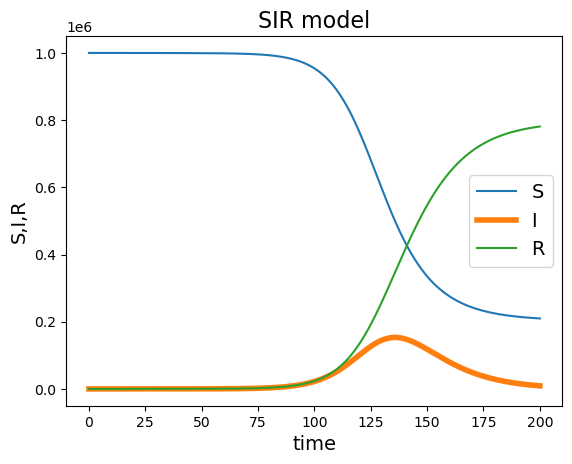

At the end of the simulation, the final values of S, I, and R are (rounded):
S(t=tf) = 209777
I(t=tf) = 9196
R(t=tf) = 781027


In [27]:
plt.plot(t, S, label = "S")
plt.plot(t, I, lw = 4, label = "I")
plt.plot(t, R, label = "R")

plt.xlabel("time", fontsize = 14)
plt.ylabel("S,I,R", fontsize = 14)
plt.title("SIR model", fontsize = 16)
plt.legend(fontsize = 14)
plt.show()

print("At the end of the simulation, the final values of S, I, and R are (rounded):")
print("S(t=tf) =", round(S[-1]))
print("I(t=tf) =", round(I[-1]))
print("R(t=tf) =", round(R[-1]))

In [28]:
max_I = np.zeros(200)                     #creates an array of 200 zeros

for T in range(1,201):                    #creates a for loop in terms of T between 1 and 200

    def SIR(y, t):
    
        S, I, R = y
    
        def beta_value(t):
            beta = 0
            if T <= t <= T+30:
                beta = 1.5*(10**(-7))
            else: 
                beta = 2*(10**(-7))
            return beta
        
        mu = 0.1
    
        N = S + I + R
        Sdot = -beta_value(t) * S * I
        Idot = beta_value(t) * S * I - mu * I
        Rdot = mu * I
    
        return Sdot, Idot, Rdot

    tf = 500
    Nsteps = 5000
    t = np.linspace(0, tf, Nsteps+1)

    S0 = 10**6 - 5
    I0 = 5
    R0 = 0
    y0 = np.array([S0, I0, R0])

    y_sol = odeint(SIR, y0, t)

    S = y_sol[:,0]
    I = y_sol[:,1]
    R = y_sol[:,2]

    max_I[T-1] = max(I)                      #replaces the (T-1)st element of the zero array with the maximum of I for that value of T 
    
    print("The maximum value of I (rounded) with T =", T, "is", round(max(I)))         #prints the maximum value of I for each T

The maximum value of I (rounded) with T = 1 is 153419
The maximum value of I (rounded) with T = 2 is 153418
The maximum value of I (rounded) with T = 3 is 153417
The maximum value of I (rounded) with T = 4 is 153416
The maximum value of I (rounded) with T = 5 is 153415
The maximum value of I (rounded) with T = 6 is 153413
The maximum value of I (rounded) with T = 7 is 153411
The maximum value of I (rounded) with T = 8 is 153410
The maximum value of I (rounded) with T = 9 is 153408
The maximum value of I (rounded) with T = 10 is 153405
The maximum value of I (rounded) with T = 11 is 153403
The maximum value of I (rounded) with T = 12 is 153400
The maximum value of I (rounded) with T = 13 is 153397
The maximum value of I (rounded) with T = 14 is 153394
The maximum value of I (rounded) with T = 15 is 153390
The maximum value of I (rounded) with T = 16 is 153386
The maximum value of I (rounded) with T = 17 is 153381
The maximum value of I (rounded) with T = 18 is 153376
The maximum value o

## Considering different values of T

The same method is used here, however it is all inside a for loop for T. Each time this is run, the maximum value of I is printed, and also stored in array, to be used later.

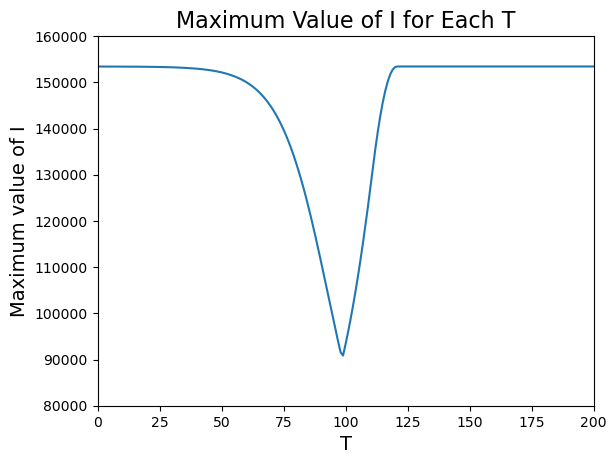

In [30]:
x = np.arange(1,201)            #creates an array of numbers from 1 to 200 in order

plt.plot(x, max_I)              #plots the array above against the array of maximum values of I

plt.xlabel("T", fontsize = 14)
plt.ylabel("Maximum value of I", fontsize = 14)
plt.title("Maximum Value of I for Each T", fontsize = 16)
plt.xlim(0,200)
plt.ylim(80000,160000)
plt.show()

## Graph of maximum of I against T

The maximum value of I is plotted against T, using the array of maximum I values from earlier. By creating an array of the numbers 1 through to 200 using the arange command from numpy to represent T, and plotting this against the maximum I array, a graph can be plotted which helps to find the mimimum value of the maximum of I.

In [32]:
print("T = 99 gives the minimum value of the maximum of I,", int(max_I[98]), "after rounding")

T = 99 gives the minimum value of the maximum of I, 90857 after rounding


## The Stochastic SIR model


This part of the assignment builds on the "Epidemiology II code" notebook, which provides code for running one simulation of the stochastic SIR model in Python. We are interested in running simulations to compare the dynamics of the deterministic SIR model and stochastic SIR model, and to estimate the probability of a major outbreak when a single infected individual enters an entirely susceptible population using the stochastic SIR model.

---

## Task A4. Comparison between the stochastic and deterministic SIR models (worth approximately 12% of the marks)

**Assignment:** The end goal of this task is to run 100 simulations of the stochastic SIR model, generate a plot showing the mean value of $I(t)$ (averaged across all of the simulations) versus $t$, and then compare this output to the analogous output from the deterministic SIR model.

Details: 
- We will use the following parameter values for the baseline case (where, throughout this assignment, time is measured in days): $\beta = 3 \times 10^{-4}$, $\mu = 0.1$, $N = 10^{3}$.
- In each simulation, there will be 10 individuals infected initially (with the rest of the population susceptible).
- The most challenging part of this task is that, in each simulation, events will occur at different times. As a result, we have to write code that, for each simulation, extracts the value of $I(t)$ at a set of pre-defined values of $t$. One way to do this is to set up a vector at the beginning of the simulation containing 201 blank entries (corresponding to $t = 0, 0.5, 1, 1.5, ..., 100$), and then populate the relevant entries after each event (i.e. put the value of $I$ before the current event in all entries corresponding to times between the last event time and the current one). This vector can then be averaged across all simulations.
- The code in the Python notebook entitled "Epidemiology_Part_A4_with_Errors" is a first attempt at writing such code (i.e. code that outputs a vector $I_{vals}$ with entries recording the values of $I$ at $t = 0, 0.5, 1, 1.5, ..., 100$) for a single simulation of the stochastic SIR model, but it contains three mistakes. Correct this code (and then copy the resulting code into your answer to this task in this notebook).
- Now that you have corrected the code described above, run 100 simulations of the stochastic SIR model and plot the average values of the vector $I_{vals}$, plotted at $t = 0, 0.5, 1, 1.5, ..., 100$.
- Finally, on the same axes, plot the analogous numerical solution of the determinstic SIR model. The team member who completed Task A1 (above) should be able to help you with this.

*Insert code and markdown cells below, as appropriate, in which to provide your response to this task.*

---

### Explanation of the Stochastic SIR model ###

Like the deterministic SIR model, the stochastic SIR model involves dividing the population according to whether they are (S)usceptible, (I)nfectious or (R)emoved. Again, $N$ is the total number of individuals, where $N = S+I+R$.

In the stochastic SIR model, at any time $t$ the infection rate is $\beta S I$ and the removal rate is $\mu I$. The total rate at which events occur is therefore $\beta S I + \mu I$.

The stochastic SIR model involves repeating the following steps:

- Sample the time from now until the next event from an exponential distribution with total rate $\beta S I + \mu I$.
- Choose the type of the next event: either an infection ($S \to S - 1$, $I \to I + 1$) or a removal ($I \to I - 1$, $R \to R + 1$).

These steps are repeated until the outbreak is over (i.e. $I$ reaches zero).

As described in the lecture, in the second step the probability that the next event is an infection is given by $\frac{\beta S I}{\beta S I + \mu I}$. The probability than the next event is instead a removal event is given by $\frac{\mu I}{\beta S I + \mu I}$.

As for the deterministic SIR model, the basic reproduction number is given by
$ R_0 = \frac{\beta N}{\mu}. $

The code below runs 100 stochastic SIR model simulations given the parameter values $ \beta = 3\times 10^{-4} , \mu = 0.1 , N = 10^3 , I_{initial} = 10$. It then calculates a mean over all the simulations for each $I$ and plots those against the time values which allows us to compare it with the deterministic SIR model's results for the same initial conditions which is then plotted on the same graph.

The way we are coding this is called the Gillespie Algorithm which uses uniform randomly distributed numbers to determine when and what event occurs.

In [36]:
# import libraries
import numpy as np # Import NumPy library. The "np" bit tells Python to give NumPy the alias of np. So now we can call np. function_name rather than numpy.
import matplotlib.pyplot as plt
from scipy.integrate import odeint # Useful for solving our ode system for our deterministic model

In [37]:
# --- Problem setup --- #
# Parameter values
beta = 3.0*10**-4 # Corrected the beta value input to 3x10^-4 from 3x10^-3
mu = 0.1

# Set up an array to record pre-determined times
tVals = np.array([i*0.5 for i in range(201)])

num_simulations = 100

#Pre-allocate the array for the the values of I for efficiency
all_IVals = np.zeros((num_simulations, 201))

In [38]:
# --- While the outbreak is ongoing (I > 0), generate events --- #
for sim in range(num_simulations): # Takes about 1min 30 seconds to run since we are doing 100 simulations where in each simulation we find 200 I values for 200 time coordinates.

# Set initial conditions and the initial time
    S = 10**3 - 10
    I = 10
    R = 0
    t = 0
    IVals = np.array([0 for i in range(201)])
    IVals[0] = I
    
    while I > 0:
    # Below is the Gillespie algorithm's determination of time
        previous_time = t
    
        r1 = np.random.uniform(0, 1, 1)
        totalRate = beta*I*S + mu*I
        t = t - (1/totalRate)*np.log(r1) 
    
        new_time = t
    
        for i in range(201):
            if previous_time <= tVals[i] < new_time: # Corrected the range of t values that would have their corresponding I values changed to I to being just those within the time interval rather than all previous times (a major mistake).
                IVals[i] = I # For each time in each simulation we have a value for I which is added to IVals array to store for each simulation

        # Gillespie algorithm's approach to finding which event happens
        r2 = np.random.uniform(0, 1, 1)
        if r2 < beta*I*S/totalRate: # Corrected probability of infection = (beta)*I*S / totalRate rather than just beta*I*S (otherwise probability > 1 which is not possible whilst r2 <= 1) 
            # If the random number is less than probability of infection then we get an infection (S compartment decreases by 1, I increases by 1)
            # Can be thought of as the higher the probability the more randomly chosen numbers between 0 and 1 lie in the range to cause an infection
            S = S - 1
            I = I + 1 
        else:
            # Takes the case for r2 > probability of infection which is a removal since at each given time there is either an infection or removal event
            I = I - 1
            R = R + 1
    
    all_IVals[sim] = IVals # the array of IVals for each simulation gets stored in a larger array of arrays called all_Ivals in the place according to the numbered simulation they are

mean_IVals = np.mean(all_IVals, axis = 0)

In [39]:
# --- Deterministic SIR model --- #
# This is the same model used in A1 but with the same initial conditions as our stochastic model
#set up function to contain the differential equations that will be solved by odeint
def deterministic_SIR(y,t):
    S, I, R = y
    Sdot = -beta * S * I
    Idot = beta * S * I - mu * I
    Rdot = mu * I
    return Sdot, Idot, Rdot

y0 = np.array([10**3 -10, 10, 0]) # initial conditions
y_sol = odeint(deterministic_SIR, y0, tVals)
I = y_sol[:,1] # In this case we only require the infection numbers at each time so we extract them

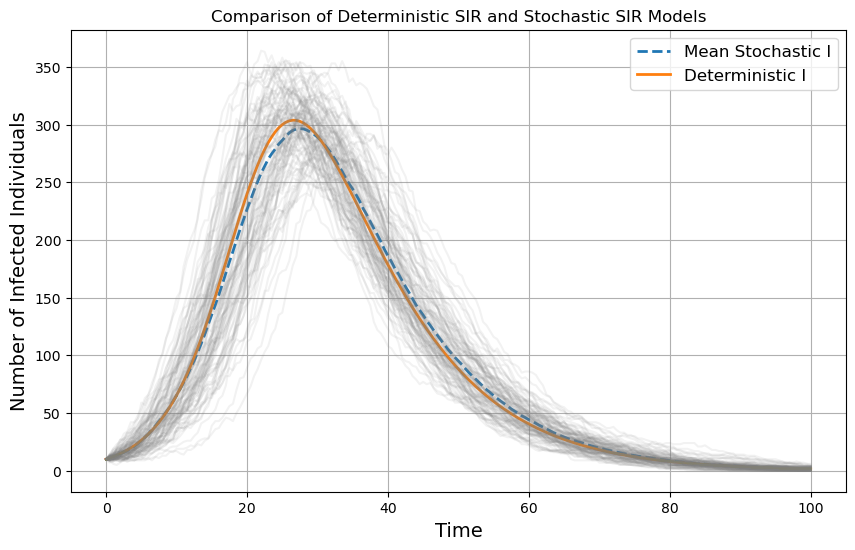

In [40]:
# --- Plot the infection vs time graph of the stochastic and deterministic models on the same axes --- #
plt.figure(figsize = (10,6))
plt.plot(tVals, mean_IVals, label = 'Mean Stochastic I', linestyle = 'dashed', linewidth = 2)
plt.plot(tVals, I, label = 'Deterministic I', linewidth = 2)

# Here I have decided to plot a faint grey shadow of all of the simulations of the stochastic model
for i in range(num_simulations):
    plt.plot(tVals, all_IVals[i], alpha = 0.1, color = 'gray') 

#Labelling the graph
plt.xlabel('Time', fontsize = 14)
plt.ylabel('Number of Infected Individuals', fontsize = 14)
plt.title('Comparison of Deterministic SIR and Stochastic SIR Models')
plt.legend(fontsize = 12)
plt.grid()
plt.show()

### Stochastic vs Deterministic SIR Modelling ###

Our graph above shows the equivalent infected individuals against time graphs from the deterministic model and the mean of 100 stochastic SIR simulations. In light grey I have chosen to show all the individual stochastic SIR simulations to show how their mean forms the blue dotted line we are taking as our predicted infection vs time graph.

Both models produce a similar resulting graph however the stochastic model takes into account the random nature of disease spread through a population by using probability to determine whether the next person is infected or not (with the probability changing depending on the number of susceptible and infected individuals $P(infection) = \frac{\beta S I}{\beta S I + \mu I}, P(removal) = \frac{\mu I}{\beta S I + \mu I}$). This can be seen by some of the more extreme simulations in grey where the graph differs wildly from the fixed deterministic model, this may be down to real-world events like a meeting of a large amount of the population causing increased disease spread or an extreme weather event causing less interactions between individuals. These will be taken into account and affect the average infected vs time graph.

## Task A5. The probability of a major outbreak (worth approximately 12% of the marks)

**Assignment:** Run 1000 simulations of the stochastic SIR model, starting from a single infected individual (with the remainder of the population susceptible). Count the number of simulations in which $I+R$ exceeds 10 before the disease fades out ($I$ hits zero), and compare this to the analytic estimate for the "probability of a major outbreak" described in the Lecture.

Details: 
- Use the following parameter values for the baseline case (where time is again measured in days): $\beta = 3 \times 10^{-4}$, $\mu = 0.1$, $N = 10^{3}$.
- Recall from the lecture that the analytic estimate for the probability of a major outbreak is $p = 1 - \frac{1}{R_0}$, where $R_0 = \frac{\beta N}{\mu}$.
- Run 1000 simulations of the stochastic SIR model. Calculate (and print) the proportion of simulations in which the final value of $I+R$ exceeds 10.
- Calculate and print the analogous analytic estimate for the probability of a major outbreak.

- Hint: To run 1000 simulations of the stochastic SIR model, you will need to use a FOR loop. To run the simulations more quickly, you do not have to store the values of $t$, $S$, $I$ and $R$ after every event (instead, simply store the value of $I + R$ at the end of the simulation).

*Insert code and markdown cells below, as appropriate, in which to provide your response to this task.*

---

In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
final_I_plus_R = np.zeros(1000)           #creates an array of 1000 zeros

count = 0                                 #asigns the variable count to the number 0

for i in range(1,1001):                   #creates a for loop in terms of i from 1 to 1000
    
    beta = 3.0*10**-4
    mu = 0.1

    SVec = np.array([])
    IVec = np.array([])
    RVec = np.array([])
    tVec = np.array([])

    S = 10**3 - 1
    I = 1
    R = 0
    t = 0

    SVec = np.append(SVec, S)
    IVec = np.append(IVec, I)
    RVec = np.append(RVec, R)
    tVec = np.append(tVec, t)

    while I > 0:
        r1 = np.random.uniform(0, 1, 1)
        totalRate = beta*I*S + mu*I
        t = t - (1/totalRate)*np.log(r1)
        
        r2 = np.random.uniform(0, 1, 1)
        if r2 < beta*I*S/totalRate:
            S = S - 1
            I = I + 1
        else:
            I = I - 1
            R = R + 1
            
        SVec = np.append(SVec, S)
        IVec = np.append(IVec, I)
        RVec = np.append(RVec, R)
        tVec = np.append(tVec, t)

    final_I_plus_R[i-1] = I+R                   #replaces the (i-1)st entry of the zeros array with the final value of I+R

    if I+R > 10:                                
        count = count + 1                       #if the final value of I+R is bigger than 10 for each T, the count increases by one
        
print(final_I_plus_R)
print("In", count,"simulations, the final value of R exceeds 10. This means, the proportion of simulations in which the final value of R exceeds 10 is", count/1000)

[916. 943. 934.   1. 927. 933. 921.   2.   1. 954.   2.   1. 963. 913.
   1.   7. 948. 940. 952. 916.   2. 928.   1. 918.   2. 939. 915. 949.
 952. 948. 954.   2.   1. 956. 932. 946. 948. 946. 955. 910. 922. 946.
   1. 931. 949. 956. 932. 949. 921.   1.   5.   2. 945.   1. 947. 947.
 947. 940.   3. 934. 947.   1. 933. 939.   1.   1. 966. 928.   1.   1.
 939.   5. 948. 911.   1. 933. 953.   1. 934. 935. 943. 949. 913. 945.
   1. 934. 930. 950.   1. 932. 929. 929. 950. 940.   4. 959. 958.   2.
 939. 941. 960. 954.   2.   1. 940.   1. 924. 945. 957.   1. 958. 947.
 942. 931.   1. 938.   1. 944. 933. 943. 931. 932.   1. 961.   1.   1.
 938. 938.   1.   1. 937. 954. 955.   1. 950.   1.   1. 939. 948. 950.
   1. 966. 932. 947.   3. 945. 954.   2. 935.   1. 933. 945. 941. 920.
   1. 956. 932. 933. 962. 939. 934. 941. 948. 932. 948. 945. 948. 956.
   1. 940. 953. 939. 923.   1. 953.   6.   1. 905.   1. 924. 952. 947.
   1.   1. 914.   4. 946. 924. 947. 954. 924. 930. 940. 944. 930. 940.
 915. 

### Running the simulation 1000 times

At the start of the cell above, an array with 1000 zeros is created, as well as a counter starting from 0. Next, the entire stochastic model is placed inside a FOR loop which runs 1000 times. On the ith run, the ith entry of the array is replaced with the final value of R. If the final value of R is strictly greater than 10, the count is also increased by 1. At the end of the 1000 simulations, the proportion of the runs which had a final R greater than 10 can be seen by dividing the count by the number of trials (in this case 1000).

Other minor changes were also made to the provided stochastic model, such as changing the population to $10^3$ as the question requirees.

In [46]:
R_0 = beta*(10**3)/mu

p = 1 - 1/R_0

print(p)

0.6666666666666667


### The analytic probability of an outbreak

The analytic probability of an outbreak is calculated above. It can be seen that this is very close to the proportion of trials with final R greater than 10. Perhaps having an even greater number of trials would bring the proportion even closer to the analytic probability.

## Section B (worth approximately 40% of the marks)

## Task B1. Extensions
**Assignment:** Using Python, write code to complete the following exercises:

- Consider the variable $M$, which represents the total number of individuals ever infected over the entire course of a simulation of the stochastic SIR model (run until $I$ hits zero) - i.e. the final value of $I + R$. Plot a graph of ${\rm Prob}(M > m)$ as a function of $m$, for the default parameter values described in Task A5 above (compute the probability by running a large number of stochastic simulations and calculating the proportion of simulations in which $M>m$). Hint: You only have to run the simulations once (rather than running multiple simulations for each value of $m$).
- Add a vertical line to the plot marking the value of $m$ that corresponds to the (positive) solution to the "final size equation" described in the Lecture (note: you will have to look up an appropriate Python function to solve this equation numerically, as in Task A2 above).
- Now instead consider the stochastic SIS model described in the paper "Will an outbreak exceed available resources for control? Estimating the risk from invading pathogens using practical definitions of a severe epidemic" by Thompson, Gilligan and Cunniffe (https://royalsocietypublishing.org/doi/epdf/10.1098/rsif.2020.0690). The key difference between the stochastic SIR model and the stochastic SIS model is that, in the stochastic SIS model, individuals go back into the $S$ compartment when they recover (rather than entering the $R$ compartment). Pick either the "Final size" or "Duration" definition of a severe epidemic described in that paper, and write code to reproduce the relevant figure from that article using model simulations (either Fig 4a or Fig 4b; n.b. you are only required to reproduce the solid lines in the chosen figure). Hint: You do not have to simulate the model until $I$ hits zero to make this figure - that might take a very long time. Instead, you can stop each simulation as soon as the relevant maximum value on the x-axis is exceeded (or when $I$ hits zero, if that occurs first).
- Most of this Assignment involved using deterministic and stochastic versions of the basic SIR model. However, the SIR model is quite simple and does not include some important features that affect transmission of pathogens in the real world. Do some research into ways that the SIR model can be extended to include additional real-world realism. Write one or two paragraphs to summarise your findings (including noting some pathogens/diseases for which the extensions that you explain are appropriate).

*Insert code and markdown cells below, as appropriate, in which to provide your response to this task.*


---

## Section B Part 1: Finding the Probability of Outbreak of Any Size ##

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [51]:
M_values = np.zeros(1000)                        #creates an array of 1000 zeros

for i in range(1,1001):                          #creates a for loop in terms of i from 1 to 1000
    
    beta = 3.0*10**-4
    mu = 0.1

    SVec = np.array([])
    IVec = np.array([])
    RVec = np.array([])
    tVec = np.array([])

    S = 10**3 - 1
    I = 1
    R = 0
    t = 0

    SVec = np.append(SVec, S)
    IVec = np.append(IVec, I)
    RVec = np.append(RVec, R)
    tVec = np.append(tVec, t)

    while I > 0:
        r1 = np.random.uniform(0, 1, 1)
        totalRate = beta*I*S + mu*I
        t = t - (1/totalRate)*np.log(r1)
        
        r2 = np.random.uniform(0, 1, 1)
        if r2 < beta*I*S/totalRate:
            S = S - 1
            I = I + 1
        else:
            I = I - 1
            R = R + 1
            
        SVec = np.append(SVec, S)
        IVec = np.append(IVec, I)
        RVec = np.append(RVec, R)
        tVec = np.append(tVec, t)

    M_values[i-1] = I+R                           #replaces the (i-1)st entry of the zeros array with the final value of I+R

### The SIR Model ###

This cell is just the SIR model running for 1000 simulation as in part A5. It stores the values of M (the final value of I+R) in an array of size 1000.

In [53]:
m_values = np.arange(0,1000)                     #creates an array of 1000 numbers from 0 to 999
prob_M_greater_than_m = np.zeros(1000)           #creates an array of 1000 zeros

for i in range(1, 1001):                         #creates a for loop in terms of i from 1 to 1000
    prob_M_greater_than_m[i-1] = np.sum(M_values > i)/1000           #creates a boolean array in which if true the numpy sum command adds 1
                                                                     #this is explained in greater detail in the markdown cell below

### Finding the Probability of M > m ###

Here two new arrays are created, one for values of m, which is all the integers from 0 to 999, and an array of 1000 zeros which will be used later in this cell. A for loop is then used, which replaces the $(i-1)^{st}$ entry in the zero array with the probability of M > m.

The probability is calculated by creating a boolean array where each value of M in 'M_values' is compared to m (which in this case is i). If M_values > i is true, the np.sum command adds 1. If false it adds 0. This effectively counts how many M values are greater than i for each i. The final step is to divide by 1000 (the number of trials) to get the probability.

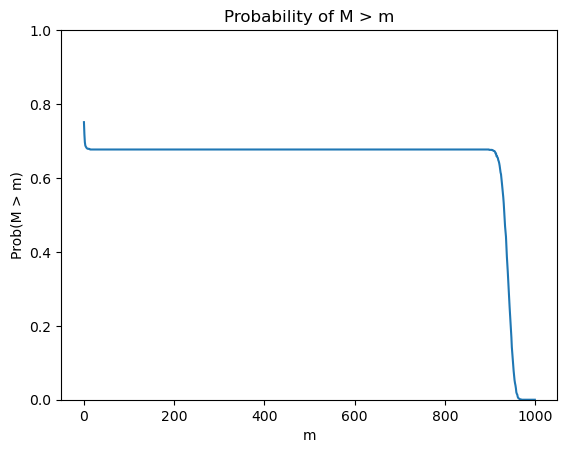

In [55]:
plt.plot(m_values, prob_M_greater_than_m)         #plots the array of numbers from 0 to 999 against the array of the probabilities of M > m
plt.xlabel('m')
plt.ylabel('Prob(M > m)')
plt.title('Probability of M > m')
plt.ylim(0, 1)
plt.show()

### Plotting Prob(M > m) against m ###

This cell simply plots the graph of the two arrays against eachother. It may seem incorrect as it would seem that the probability near m = 0 should be near 1, whereas the graph shows it to be near 0.75. This is due to the fact that we are plotting the strict inequality Prob(M > m) instead of Prob(M >= m). Plotting the latter would show that the probability approaches 1 as m approaches 0. Other than that, the graph shows the shape you would expect. It is obviously decreasing, with a large decrease near 0 and about 950, and the rest being relatively flat. This is due to the nature of the stochastic model, as the infected either never grow large and quickly become removed in which case M is small (normally below 10), or a breakout occurs and the infected grow very large, such that the final removed value is in the 900's. It is very rare for M to be between that, which is reflected in the graph.

In [57]:
def func(R):
    return R - 1000 + 1000*np.exp(-(3.0*10**-4)*R/0.1)     # creates a function which returns the final size equation rearranged to equal 0

x0 = 500                              #an initial guess of 500 is used

root = fsolve(func, x0)               #the fsolve function is used to numerically calculate  the final value of R

root_values = [root, root]            #a 2 by 2 array is created of the solution values

### Solving the final size equation ###

The final size equation is defined as a function and has been rearranged to equal 0. An initial guess is used, the initial guess being 500. Then fsolve is called which numerically solves the defined function. An array of size 2 is created, where each value is equal to 'root', the numerical solution to the final size equation

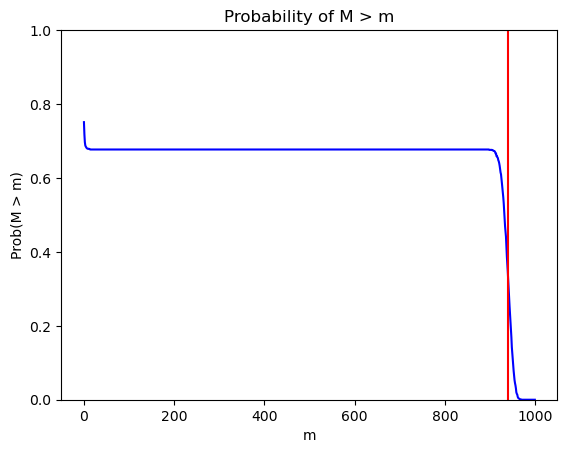

In [59]:
plt.plot(m_values, prob_M_greater_than_m, 'b')
plt.plot(root_values, [0,1],'r')                #the solution array is plotted against the 2 by 2 array with 0 and 1 to plot a vertical line
plt.xlabel('m')
plt.ylabel('Prob(M > m)')
plt.title('Probability of M > m')
plt.ylim(0, 1)
plt.show()

### Plotting the solution to the final size equation ###

The array from the previous cell is plotted in the interval $0 \le Prob(M > m) \le 1$, which creates a vertical line corresponding to the solution of the final size equation.

## Section B Part 2: Investigation into the Stochastic SIS Model

### Defining a severe outbreak ###
When looking at outbreaks, possible ways of defining the severity of an outbreak are:
- the concurrent size (number of individuals infected simultaneously)
- the total number of infections
- the duration

Having multiple ways of looking at the severity of an outbreak are useful to achieve an appropriate risk assessment in different situations. For example, when looking at the number of available hospital beds, you would use the concurrent size and when looking at the amount of treatment to stockpile you would use total size.

A real-world example of this is the 2018 Ebola outbreak in the Democratic Republic of Congo. In this outbreak there were 53 cases of Ebola (relatively high). However, it was not defined as a serious outbreak as it was contained very quickly and so the duration was very short. However, if the concurrent size or total number of infections was used to define the outbreak it may have been considered severe.

### Explanation of the stochastic SIS model ###
### SIS model
The compartmental SIS model is very similar to the SIR model however, when an individual recovers from an infection, they can able to become infected again. This means there are only two compartments: (S)usceptible and (I)nfected. And so, our population size N is given by N = S + I

As in the SIR model, at any time $t$ the infection rate is $\beta S I$ and the removal rate is $\mu I$. However, as it is an SIS model, the removal rate is now the rate people move from $I$ to $S$ as they can be infected again. This gives a total rate at which events occur as $\beta SI + \mu I$.

We will run the stochastic SIS using the same Gillespie Algorithm as described before in the stochastic SIR model by:
- sampling the time until the next event from an exponential disrtibution with total rate $\beta SI + \mu I$
- choosing the type of next event: an infection ($S \to S - 1$, $I \to I +1$) or a removal ($S \to S + 1$, $I \to I - 1$)

We have the same probabilies $\frac{\beta SI}{\beta SI + \mu I}$ of infection and probability $\frac{\mu I}{\beta SI + \mu I}$ of removal as before



### Investigating the probability of reaching a total number of infections with different values of $R0$
We will now run the stochastic SIS model and look at the severity of the outbreak defined by total number of infections. \
\
We will run the stochastic model with 1000 simulations and track the total number of infections reached in each simulation. This can then be used to work out the probability of reaching a total number of infections for infection number. \
\
We will then repeat these simulations for different values of $R0$ (by varing $\beta$) and see how that effects the probabilities of reaching different total sizes.

In this code we will use intial parameters $\mu = 0.1$, $I(0) = 1$, $N = 10^{3}$ and different values of $\beta$ to give different $R0$ values.

R0 = 0.8 simulation run
R0 = 1.01 simulation run
R0 = 1.1 simulation run
R0 = 1.3 simulation run
R0 = 1.6 simulation run
R0 = 2 simulation run


<function matplotlib.pyplot.show(close=None, block=None)>

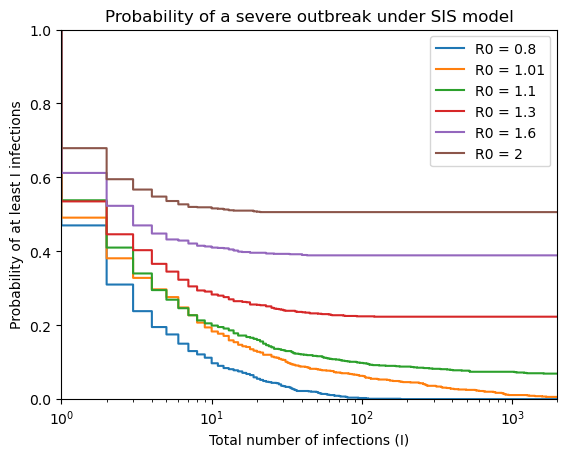

In [65]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# create a vector of all R0 values
R0_values =[0.8,1.01,1.1,1.3,1.6,2]

# use a for loop to run simulation for all R0 values
for R0 in R0_values:

    # create a vector to record total infections in all simulations then use a for loop to run through 1000 simulations
    all_total = np.zeros(1000)
    for i in range(1,1001):
        
        # set initial parameters
        total_I = 1
        mu = 0.1
        beta = R0 * mu / 1000

        # create vectors for suspectible, infected and time
        SVec = np.array([])
        IVec = np.array([])
        tVec = np.array([])

        # set initial susceptible, infected and time
        S = 10**3 - 1
        I = 1
        t = 0
        
        # add initial values into vector 
        SVec = np.append(SVec, S)
        IVec = np.append(IVec, I)
        tVec = np.append(tVec, t)
        
        # create a while loop to cycle through events, stopping when there are no infected people or after 4000 iterations
        iterations = 0
        while I > 0 and iterations<4000:
            # generate a random variable r1 between 0 and 1
            r1 = np.random.uniform(0, 1, 1)
            # use r1 to sample a time until the next event from an exponential distribution with total rate beta*I*S + mu*I
            totalRate = beta*I*S + mu*I
            t = t - (1/totalRate)*np.log(r1)
            # generate a random variable r2 between 0 and 1
            r2 = np.random.uniform(0, 1, 1)
            # use r2 to determine type of event occuring with relevant probabilities
            if r2 < beta*I*S/totalRate:
                S = S - 1
                I = I + 1
                total_I = total_I +1
            else:
                I = I - 1
                S=S+1
            # add new values for susceptible, infected and time to relevant vectors
            SVec = np.append(SVec, S)
            IVec = np.append(IVec, I)
            tVec = np.append(tVec, t)
            # increase the iteration counter by 1
            iterations=iterations+1
        # add the total number of infections to the relevant slot in the array containing all total values
        all_total[i-1] = total_I

    
    # create a vector for the probabilities
    probability = np.zeros(2000)
    # create a vector containing with numbers 1-1000 representing total number of people infected   
    num_infections_Vec = list(range(0,2000))
    # loop through total no. of infected people working out the relevant probability for each one and adding it to the probability vector
    for i in num_infections_Vec:
        probability[i] = np.sum(all_total >= i)/1000

    
    # plot a setp graph of the probability of at least I infections against total number of infections I
    plt.step(num_infections_Vec,probability, label = f"R0 = {R0}")
    print(f"R0 = {R0} simulation run") # this line is used to show progress through simulations as simulations can take a while to run
    plt.xlim(1,2000)
    plt.ylim(0,1)
    plt.xscale("log")

# add labels to the axis and graph and display it
plt.xlabel("Total number of infections (I)")
plt.ylabel("Probability of at least I infections")
plt.title("Probability of a severe outbreak under SIS model")
plt.legend()
plt.show

### Findings from the investigation
From the graph produced, we see that for all our values of $R0$ there is a decrease in the probability between 1-10 total infections. This is because the chance of an outbreak dying out is high when there are only a small number of infections. \
\
Simulations with a higher basic reproduction number have a higher probability of reaching a certain total number of infections as individuals in these simulations will infect more people on average and so create a larger outbreak. We see that the outbreak with $R0 = 0.8$ has an incredibly small chance of reaching even 10 total infections as the infection rate is so low. For the simulations with $R0$ > 1 we see that the probabilities tend to a constant value for increasing total infections. This is because once an outbreak reaches a certain threshold number of infections (around 10-40) the chance of everyone recovering out before they infected someone else is extremely low. \
\
Since we are running an SIS model, individuals can be infected multiple times and so the outbreak can last forever. This can be seen as even though we have a population of 1000 people, the probabilities of reaching values over 1000 remain the same as just before 1000. 


## Section B Part 3: Extending the SIR Model ##

The SIDARTHE model, introduced at the beginning of the COVID-19 pandemic, extends the traditional deterministic SIR model to include more compartments where the rate parameters may be different due to infection control measures for diagnosed individuals, hospital capacity and diagnosis delays. For example, an infected person who is undiagnosed will likely cause more infections than somebody who is diagnosed due to self-isolation procedures introduced in COVID-19 and symptomatic cases will likely cause more infections due to COVID-19's spread through droplets released during coughing. The compartments include Susceptible (S), Infected - asymptomatic and undetected (I), Diagnosed - asymptomatic, detected (D), Ailing - symptomatic, undetected (A), Recognized - symptomatic, detected (R), Threatened - acutely symptomatic, detected (T), Healed (H), Extinct (E). The rates of change are described by:
$$\frac{{\rm d} S}{{\rm d} t} = -S(t)(\alpha I(t) + \beta D(t) + \gamma A(t) + \delta R(t))$$
$$\frac{{\rm d} I}{{\rm d} t} = S(t)(\alpha I(t) + \beta D(t) + \gamma A(t) + \delta R(t)) - (\epsilon + \zeta + \lambda)I(t)$$
$$\frac{{\rm d} D}{{\rm d} t} = \epsilon I(t) - (\eta + \rho)D(t)$$
$$\frac{{\rm d} A}{{\rm d} t} = \zeta I(t) - (\theta + \mu + \kappa)A(t)$$
$$\frac{{\rm d} R}{{\rm d} t} = \eta D(t) + \theta A(t) - (\nu + \xi)R(t)$$
$$\frac{{\rm d} T}{{\rm d} t} = \mu A(t) + \nu R(t) - (\sigma + \tau)T(t)$$
$$\frac{{\rm d} H}{{\rm d} t} = \lambda I(t) + \rho D(t) + \kappa A(t) + \xi R(t) + \sigma T(t)$$
$$\frac{{\rm d} E}{{\rm d} t} = \tau T(t)$$
$\alpha , \beta , \gamma , \delta$ describe the rate of change between S and I due to the values of I, D, A, R. $\epsilon$ corresponds to I -> D, $\zeta$ is I -> A, $\eta$ is D -> R, $\theta$ is A -> R, $\kappa$ is A -> H, $\lambda$ is I -> H, $\mu$ is A -> T, $\nu$ is R -> T, $\xi$ is R -> H, $\rho$ is D -> H, $\sigma$ is T -> H, $\tau$ is T -> E 
By modelling the number of people who are acutely symptomatic we can attempt to predict the strain on healthcare services which is important so that appropriate funding and staff may be allocated to them before they are overwhelmed. 
Later, the model was extended to make use of fractional order differential equations which have a particular memory-effect where the next state does not only depend on the current state but also all the previous states as diseases do.

Below is a run of the SIDARTHE model using data from [1] taken from day 1 of the COVID-19 spread in Italy. We shall use this to model what may have happened without any social-distancing or other containment measures being present (within the article they discuss the change of the parameters over time as new guidance comes into place). Note: This model takes each value S, I, D, A, R, T, H, E as a proportion of the total population of 60 million, for example I = 1 corresponds to everyone being infected.


In [68]:
# import libraries
import numpy as np # Import NumPy library. The "np" bit tells Python to give NumPy the alias of np. So now we can call np. function_name rather than numpy.
import matplotlib.pyplot as plt
from scipy.integrate import odeint # Useful for solving our ode system for our deterministic model

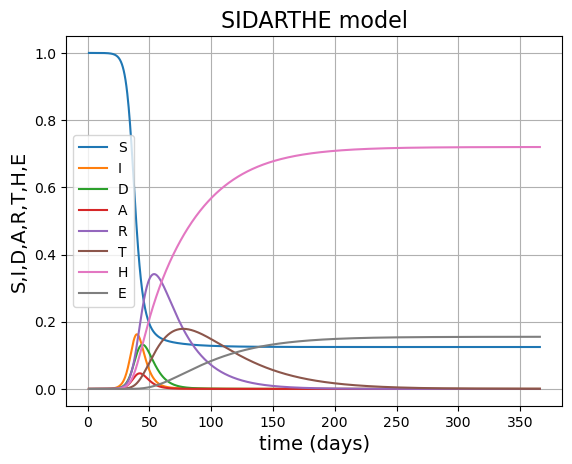

In [69]:
# For day 1 of COVID 19 in Italy (data from [1], methods)
alpha = 0.570
beta = 0.011
gamma = 0.456
delta = 0.011
epsilon = 0.171
zeta = 0.125
eta = 0.125
theta = 0.371
kappa = 0.017
lamda = 0.034
mu = 0.017
nu = 0.027
xi = 0.017
rho = 0.034
sigma = 0.017
tau = 0.01

# define our differential equations in a function so we can solve them using odeint
def SIDARTHE(y,t):
    S, I, D, A, R, T, H, E = y
    Sdot = -S * (alpha * I + beta * D + gamma * A + delta * R)
    Idot = S * (alpha * I + beta * D + gamma * A + delta * R) - (epsilon + zeta + lamda) * I
    Ddot = epsilon * I - (eta + rho) * D
    Adot = zeta * I - (theta + mu + kappa) * A
    Rdot = eta * D + theta * A - (nu + xi) * R
    Tdot = mu * A + nu * R - (sigma + tau) * T
    Hdot = lamda * I + rho * D + kappa * A + xi * R + sigma * T
    Edot = tau * T
    return Sdot, Idot, Ddot, Adot, Rdot, Tdot, Hdot, Edot

# set up time grid for the solution
tVals = np.linspace(1, 366, 1000)

# initial conditions
y0 = [1 - 200/60e6 - 20/60e6 - 1/60e6 - 2/60e6, 200/60e6, 20/60e6, 1/60e6, 2/60e6, 0, 0, 0]

# --- Call the ODE solver and extract solutions --- #
y_sol = odeint(SIDARTHE, y0, tVals)

# extract S, I, D, A, R, T, H, E from the solution array y
S = y_sol[:,0]
I = y_sol[:,1]
D = y_sol[:,2]
A = y_sol[:,3]
R = y_sol[:,4]
T = y_sol[:,5]
H = y_sol[:,6]
E = y_sol[:,7]

# plot the time evolution of the S, I, D, A, R, T, H, E
plt.plot(tVals, S, label = "S")
plt.plot(tVals, I, label = "I")
plt.plot(tVals, D, label = "D")
plt.plot(tVals, A, label = "A")
plt.plot(tVals, R, label = "R")
plt.plot(tVals, T, label = "T")
plt.plot(tVals, H, label = "H")
plt.plot(tVals, E, label = "E")

# labels etc
plt.xlabel("time (days)", fontsize = 14)
plt.ylabel("S,I,D,A,R,T,H,E", fontsize = 14)
plt.title("SIDARTHE model", fontsize = 16)
plt.legend(fontsize = 10)
plt.grid()
plt.show()  

This model assumes that individuals may only be infected once we we later found to not be the case over a larger time period like the year which we have plotted which is largely the reason why our model predicts the end of the epidemic after around half a year, this means our model is more appropriate to be used for predictions over a shorter time span where reinfection is negligible due to the antibodies obtained.

References:

[1] Giordano, G., Blanchini, F., Bruno, R. et al. Modelling the COVID-19 epidemic and implementation of population-wide interventions in Italy. Nat Med 26, 855–860 (2020). https://doi.org/10.1038/s41591-020-0883-7

[2] Higazy, M. (2020). Novel fractional order SIDARTHE mathematical model of COVID-19 pandemic. Chaos, Solitons & Fractals, 138, 110007. https://doi.org/10.1016/j.chaos.2020.110007

[3] World Health Organisation. Coronavirus Disease (COVID-19) https://www.who.int/health-topics/coronavirus#tab=tab_1


## Notes about this submission

You will submit a single Jupyter notebook for this project assignment (this notebook, with your additions).

- The last thing you should do before submitting the notebook is to Restart Kernel and Run All Cells. You should then save the notebook and submit the .ipynb file. **You will lose marks if you submit a notebook that has not been run.**

- You are expected to add code and markdown cells to this document as appropriate to provide your responses to the tasks. However, throughout this assignment, please do use the deterministic and stochastic SIR model codes from the Epidemiology I and Epidemiology II code notebooks as required (i.e., you are supposed to copy that code across and adapt it, rather than start coding from scratch).

- This assignment lends itself to producing a nice document. A good guide for what the final notebook should be like is: if the notebook is run and all code cells and task descriptions are collapsed, the notebook should be readable as a short report, primarily consisting of a short introduction to each section followed by figures and descriptions of the figures.

- Use the comments in the "Epidemiology I code" notebook as a guide to the level of code commenting expected. Each code cell should begin with a comment line or lines concisely stating what the cell is for (alternatively, precede the code cell with a markdown cell explaining what you are about to do). Functions should have comments describing what they do. It can be assumed that the reader understands Python to a basic level (e.g. comments like "Create an array" or "Make a plot" on every line are unnecessary). Add comments to set off blocks of code or to note anything tricky.

---